In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import glob
import os
import sqlite3


In [2]:
dirs = glob.glob('/Users/yoachim/runs/all_db_ln/*/')
names = [direc.split('/')[-2] for direc in dirs]
order = np.argsort(names)
d2 = [dirs[i] for i in order]
dirs = d2

In [3]:
fO = []
teff = []
for direc in dirs:
    conn = sqlite3.connect(os.path.join(direc, 'resultsDb_sqlite.db'))
    df = pd.read_sql('select summaryValue from summaryStats where summaryName="fONv MedianNvis"', conn)
    fO.append(df['summaryValue'].values)
    df = pd.read_sql('select summaryValue from summaryStats where metricId=4', conn)
    teff.append(df.values)
    conn.close()
    

In [4]:
fO = np.array(fO).ravel()
teff = np.array(teff).ravel()
for val,direc in zip(fO, dirs):
    print(val, direc.split('/')[-2])

943.0 agnddf_v1.4_10yrs
833.0 alt_roll_mod2_dust_sdf_0.20_v1.4_10yrs
830.0 baseline_2snapsv1.4_10yrs
900.0 baseline_v1.4_10yrs
814.0 bulges_bs_v1.4_10yrs
804.0 bulges_bulge_wfd_v1.4_10yrs
813.0 bulges_cadence_bs_v1.4_10yrs
804.0 bulges_cadence_bulge_wfd_v1.4_10yrs
804.0 bulges_cadence_i_heavy_v1.4_10yrs
804.0 bulges_i_heavy_v1.4_10yrs
900.0 dcr_nham1_v1.4_10yrs
902.0 dcr_nham2_v1.4_10yrs
904.0 dcr_nham3_v1.4_10yrs
906.0 dcr_nham4_v1.4_10yrs
908.0 dcr_nham5_v1.4_10yrs
934.0 descddf_v1.4_10yrs
900.0 euclidddf_v1.4_10yrs
890.0 footprint_add_mag_cloudsv1.4_10yrs
902.0 footprint_big_sky_dustv1.4_10yrs
979.0 footprint_big_sky_nouiyv1.4_10yrs
958.0 footprint_big_skyv1.4_10yrs
903.0 footprint_bluer_footprintv1.4_10yrs
848.0 footprint_gp_smoothv1.4_10yrs
725.0 footprint_newAv1.4_10yrs
788.0 footprint_newBv1.4_10yrs
911.0 footprint_no_gp_northv1.4_10yrs
902.0 footprint_standard_goalsv1.4_10yrs
1431.0 footprint_stuck_rollingv1.4_10yrs
909.0 pair_strategy_0_v1.4_10yrs
899.0 pair_strategy_1_v1.4_10

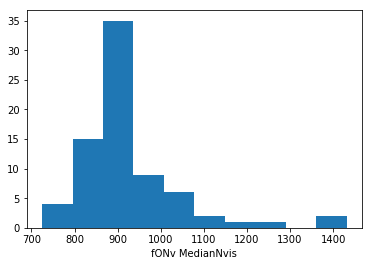

In [5]:
ack = plt.hist(fO, bins=10)
plt.xlabel('fONv MedianNvis')

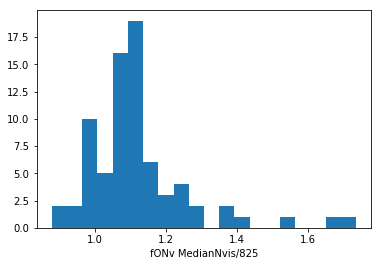

In [6]:
ack = plt.hist(fO/825, bins=20)
plt.xlabel('fONv MedianNvis/825')

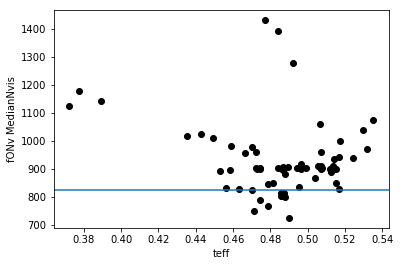

In [7]:
plt.plot(teff, fO, 'ko')
plt.xlabel('teff')
plt.ylabel('fONv MedianNvis')
plt.axhline(825)

In [8]:
dirs=np.array(dirs)

In [9]:
dirs[np.where(teff < 0.4)]

array(['/Users/yoachim/runs/all_db_ln/short_exp_5ns_1expt_v1.4_10yrs/',
       '/Users/yoachim/runs/all_db_ln/short_exp_5ns_5expt_v1.4_10yrs/',
       '/Users/yoachim/runs/all_db_ln/twilight_neo_mod1_v1.4_10yrs/'],
      dtype='<U69')

In [10]:
dirs[np.where(fO > 1200)]

array(['/Users/yoachim/runs/all_db_ln/footprint_stuck_rollingv1.4_10yrs/',
       '/Users/yoachim/runs/all_db_ln/weather_1.2_ndt_v1.4_10yrs/',
       '/Users/yoachim/runs/all_db_ln/weather_1.2_v1.4_10yrs/'],
      dtype='<U69')